In [1]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_df = pd.read_csv("Telco-Customer-Churn.csv")
df = main_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### EDA - Exploratory Data Analysis

In [3]:
# Shape of dataframe
df.shape

(7043, 21)

In [4]:
# List of all columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Basic Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# List of all features with number of unique values present in them
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Statistical measure of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# We are dropping CustomerID because it will not make any contribution in prediction.
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Here totalcharges are object types so we need to change it into numeric format
df['TotalCharges'].dtype

dtype('O')

In [10]:
# Changing in numeric format
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")

In [11]:
# Checking for null values 
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Dropping all the rows in which value in not known
print(df[df['TotalCharges'].isnull()].index)
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.shape

(7032, 20)

## Visualization

<Axes: >

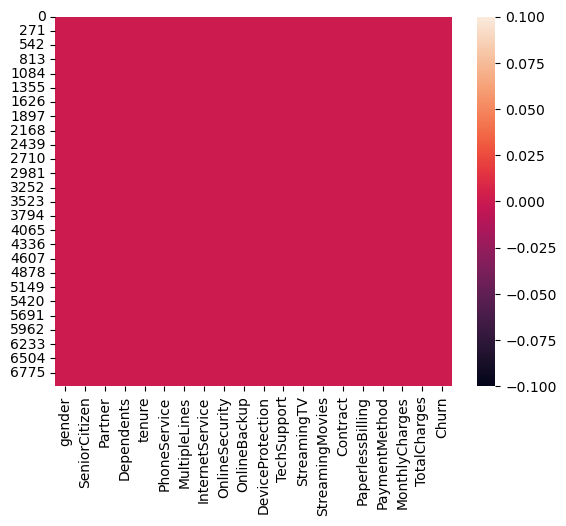

In [15]:
# Visualization of null values
sns.heatmap(df.isnull()) # (cmap="coolwarm","Blues","gray","viridis(d)") (cbar=True(d),False)

In [16]:
# Checking Correlation 
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


<Axes: >

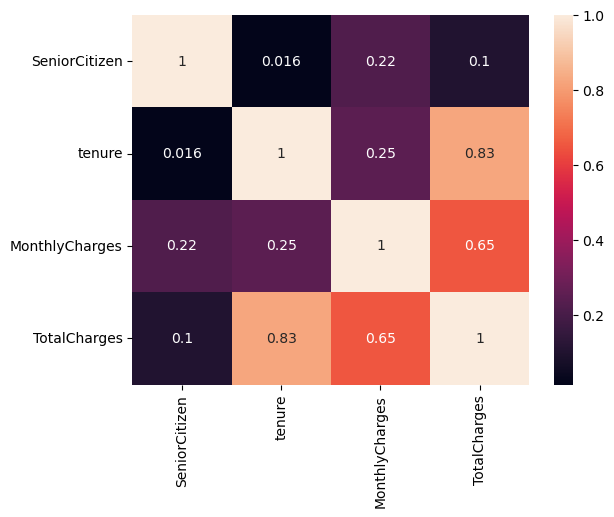

In [17]:
# Visualizing correalation
sns.heatmap(df.corr(), annot=True) #(cmap='viridis'(d),'coolwarm', 'Blues', 'RdYlGn'),(annot=False(d),True),(cbar=True(d),False)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

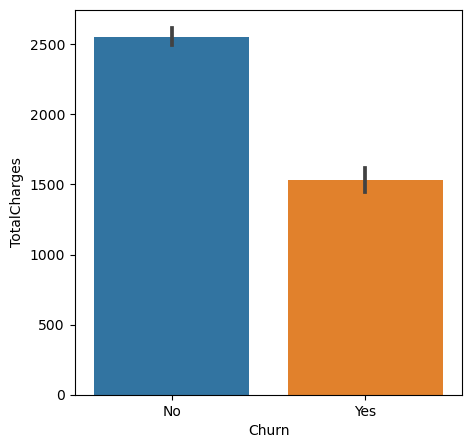

In [18]:
# average TotalCharges for churned vs non-churned customers
plt.figure(figsize=(5, 5))
sns.barplot(data = df, y="TotalCharges", x="Churn")#data=df, x=categorical, y=numerical,hue=Categorical,palette=("Blues", "coolwarm")

<Axes: xlabel='tenure', ylabel='Churn'>

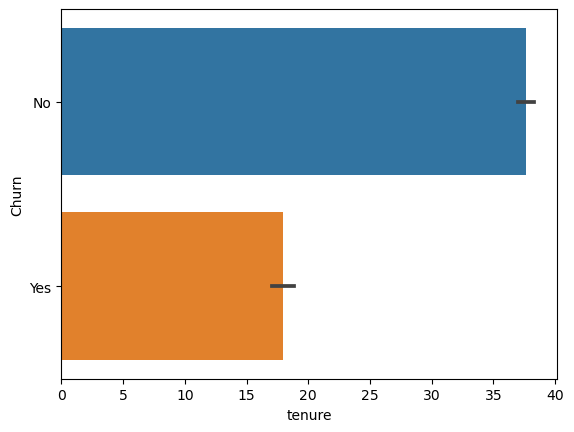

In [19]:
# average tenure for churned vs non-churned customers
sns.barplot(data = df, x="tenure", y="Churn")

In [20]:
# relationship btw tenure & total charges
px.scatter(df, y="TotalCharges", x="tenure")#data_frame=df,x=numerical,y=numerical,color=categorical

In [21]:
# churned vs non-churned based on senior citizen
diag = px.histogram(df, x="Churn", color="SeniorCitizen") #data_frame=df,x=numerical,y=numerical,color=categorical,barmode=("relative"(d),"group","overlay")
diag.update_layout(width=750, height=550)
diag.show()

In [22]:
diag = px.pie(df, values='TotalCharges', names='Churn', hole=0.7)#data_frame=df,values=numerical,names=categorical,color=categorical,hole=0(d),0.3, 0.5, 0.7
diag.show()

In [23]:
labels = df['MultipleLines'].unique()
values = df['MultipleLines'].value_counts()
print(values)
# pull fraction of the pie radius
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.1, 0.2])])#labels=category,values=size,pull=([0, 0.1, 0.2], [0, 0.05, 0.15]),hole=(0(d), 0.3, 0.5, 0.7)
diag.show()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


In [24]:
labels = df['InternetService'].unique()
values = df['InternetService'].value_counts()
print(values)
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.3])])#labels=category,values=size,pull=([0, 0.1, 0.2], [0, 0.05, 0.15]),hole=(0(d), 0.3, 0.5, 0.7)
diag.show()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


In [25]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
print(values)
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])#labels=category,values=size,pull=([0, 0.1, 0.2], [0, 0.05, 0.15]),hole=(0(d), 0.3, 0.5, 0.7)
diag.show()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


In [26]:
labels = df['Contract'].unique()
values = df['Contract'].value_counts()
print(values)
diag = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2, 0.3])])#labels=category,values=size,pull=([0, 0.1, 0.2], [0, 0.05, 0.15]),hole=(0(d), 0.3, 0.5, 0.7)
diag.show()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


### Preprocessing Data

In [27]:
print (df['Partner'].value_counts(ascending=True))

Yes    3393
No     3639
Name: Partner, dtype: int64


In [28]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("-----------------------------------------------------")

gender : ['Female' 'Male']
-----------------------------------------------------
Partner : ['Yes' 'No']
-----------------------------------------------------
Dependents : ['No' 'Yes']
-----------------------------------------------------
PhoneService : ['No' 'Yes']
-----------------------------------------------------
MultipleLines : ['No phone service' 'No' 'Yes']
-----------------------------------------------------
InternetService : ['DSL' 'Fiber optic' 'No']
-----------------------------------------------------
OnlineSecurity : ['No' 'Yes' 'No internet service']
-----------------------------------------------------
OnlineBackup : ['Yes' 'No' 'No internet service']
-----------------------------------------------------
DeviceProtection : ['No' 'Yes' 'No internet service']
-----------------------------------------------------
TechSupport : ['No' 'Yes' 'No internet service']
-----------------------------------------------------
StreamingTV : ['No' 'Yes' 'No internet service']
---------

* Above cell shows us the list of all features with their respective categorical variables

In [29]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

* Replace long negative text by "No" for ease of access

In [30]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(f'{i} : {df[i].unique()}')
        print("****************************************************")

gender : ['Female' 'Male']
****************************************************
Partner : ['Yes' 'No']
****************************************************
Dependents : ['No' 'Yes']
****************************************************
PhoneService : ['No' 'Yes']
****************************************************
MultipleLines : ['No' 'Yes']
****************************************************
InternetService : ['DSL' 'Fiber optic' 'No']
****************************************************
OnlineSecurity : ['No' 'Yes']
****************************************************
OnlineBackup : ['Yes' 'No']
****************************************************
DeviceProtection : ['No' 'Yes']
****************************************************
TechSupport : ['No' 'Yes']
****************************************************
StreamingTV : ['No' 'Yes']
****************************************************
StreamingMovies : ['No' 'Yes']
****************************************************
Contract : 

* After Removing all long values we have above dataframe

In [31]:
print(df['gender'].value_counts(ascending=True))

Female    3483
Male      3549
Name: gender, dtype: int64


In [32]:
# Replaceing Male be 0 and Female by 1

df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
print(df['InternetService'].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: InternetService, dtype: int64


* There are few features in which categorical variables are more than two and they are not "Yes" or "No" types

In [34]:
for i in df.columns:
    if (len(df[i].unique()) >2) & (df[i].dtypes != "int64") &(df[i].dtypes!= "float64"):
        print(i)

InternetService
Contract
PaymentMethod


* Above 3 Features column in dataset have more than 2 categorical values

In [35]:
print(df['InternetService'].value_counts(ascending=True))

No             1520
DSL            2416
Fiber optic    3096
Name: InternetService, dtype: int64


In [36]:
print(df['Contract'].value_counts(ascending=True))

One year          1472
Two year          1685
Month-to-month    3875
Name: Contract, dtype: int64


In [37]:
print(df['PaymentMethod'].value_counts(ascending=True))

Credit card (automatic)      1521
Bank transfer (automatic)    1542
Mailed check                 1604
Electronic check             2365
Name: PaymentMethod, dtype: int64


In [38]:
len(df['PaymentMethod'].unique())

4

* To deal with such feature column we are required to use one-hot encoding.

In [39]:
more_than_2 = ['InternetService' ,'Contract' ,'PaymentMethod']
df = pd.get_dummies(data=df, columns= more_than_2)
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [40]:
df.shape

(7032, 27)

In [41]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [42]:
for i in df.columns:
    if (df[i].dtypes == "int64")  | (df[i].dtypes== "float64"):
        print(i)

gender
SeniorCitizen
tenure
MonthlyCharges
TotalCharges


* Above feature column have numerical data so we will need to bring it into a particular range if they varies a lot

In [43]:
# Using MinMaxScaler of Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

* Here we will consider gender and seniorcitizen because because their values already present in a small scale of 0 or 1
* So we will consider only "tenure", "MonthlyCharges", "TotalCharges"

In [44]:
large_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df[large_cols] = scaler.fit_transform(df[large_cols])
df[large_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


In [45]:
# After feature scaling we have following dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,Yes,No,0.000000,No,No,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
1,0,0,No,No,0.464789,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1
2,0,0,No,No,0.014085,Yes,No,Yes,Yes,No,...,1,0,0,1,0,0,0,0,0,1
3,0,0,No,No,0.619718,No,No,Yes,No,Yes,...,1,0,0,0,1,0,1,0,0,0
4,1,0,No,No,0.014085,Yes,No,No,No,No,...,0,1,0,1,0,0,0,0,1,0


In [46]:
for i in df.columns:
    if (df[i].dtypes == "object"):
        print(i)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


* All the column present above have object type of dataset in them i.e here only "Yes" or "No"

In [47]:
two_cate = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [48]:
# Splitting Dataset into train and test set
X = df.drop('Churn', axis=1)
y = df['Churn']

In [49]:
X.shape, y.shape

((7032, 26), (7032,))

In [50]:
# Performing Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Using Logistics Regression

In [51]:
# Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
# creating object for model
model_lg = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)

In [53]:
# Model Training
model_lg.fit(X_train, y_train)

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

In [54]:
# Making Predictions
pred_lg = model_lg.predict(X_test)

In [55]:
# Calculating Accuracy of the model
lg = round(accuracy_score(y_test, pred_lg)*100,2)
print(lg)

80.01


In [56]:
# Classification Report
print(classification_report(y_test, pred_lg))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1711
           1       0.64      0.54      0.58       610

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.79      0.80      0.79      2321



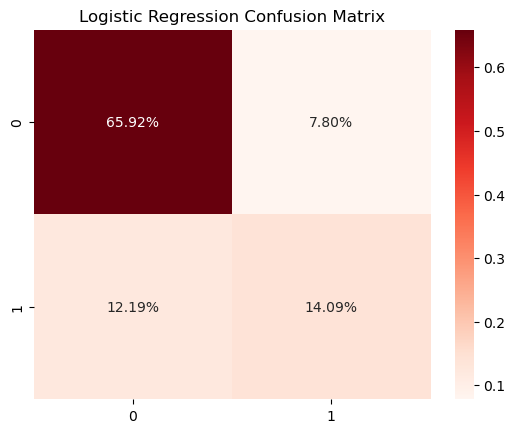

In [57]:
# confusion Matrix
cm1 = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm1/np.sum(cm1), annot=True, fmt='0.2%', cmap="Reds")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

### Using Random Forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Creating model object
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)

In [60]:
# Training Model
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=0.16, n_estimators=300, random_state=42)

In [61]:
# Making Prediction
pred_rf = model_rf.predict(X_test)

In [62]:
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, pred_rf)*100, 2)
print(rf)

73.72


In [63]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



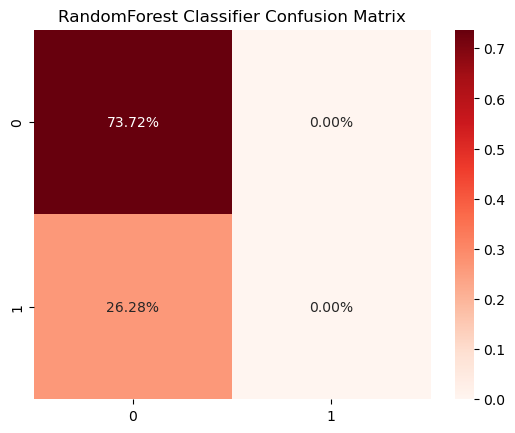

In [64]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()